# Utility Functions

## Importing libraries

In [347]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


## Function to generate dataset with bias

In [348]:
def generate_dataset(mu,sigma, shape):
    
    X_without_bias = np.random.normal(mu, sigma, shape)
    bias_column = np.ones((100,1))
    X = np.append(bias_column, X_without_bias, axis=1)
    Y = np.random.uniform(1,2,100)
    return X,Y

## Function to get matrix transpose

In [349]:
def get_matrix_transpose(matrix):
    rows = len(matrix)
    columns = len(matrix[0])
    return np.array([[matrix[row][col] for row in range(rows)] for col in range(columns)])

## Function to solve linear equation

In [355]:
def solve_linear_equation_custom(A,b):
    
    #I have merged the guassian elimination and forward elimination in single loop below
    
    n =  len(A)
    for k in range(n-1):
        for i in range(k+1, n):
            A[i][k] = A[i][k]/A[k][k]
            for j in range(k + 1, n):
                A[i][j] = A[i][j] - A[i][k]*A[k][j]
            b[i] = b[i] - A[i][k]*b[k]
            
    
    x = np.zeros(n)
    
    #Backward Solve
    for i in range(n-1,-1,-1):
        s = b[i]
        for j in range(i+1, n):
            s = s - A[i][j]*x[j]
        x[i] = s / A[i][i]
    return x

## Function to do prediction (y_hat) on feature matrix X

In [351]:
def predict_simple_line_regression(X, beta_hat):
    
    y_hat = np.dot(X,beta_hat.T)
    return y_hat

## Function to draw plot

In [352]:
def draw_3d_graph(X, Y, prediction):
    
    #plane calculation
    k = 10 #size of the plane
    p1, p2 = np.mgrid[:k, :k]
    P = np.hstack((np.reshape(p1, (k*k, 1)), np.reshape(p2, (k*k, 1))))
    plane = np.reshape(prediction, (k, k));

    #plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(X[:,0], X[:,0],Y ,'ro') #scatter plot
    ax.plot_surface(p1,p2,plane) #plane plot
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('Y')

    plt.show()

## Function to learn beta_hat and predict y_hat using lstsq buildin function

In [353]:
def learn_linear_regression_using_lstsq(X, Y):
    beta_hat = np.linalg.lstsq(X, Y, rcond=None)[0]
    return beta_hat

## Main function 

<ol>
  <p>Steps followed in main function to solve the problem:</p>
    <br>
  <li>First set the variable values for generating dataset as specified in the question.</li>
  <li>Then use generate dataset function to generate feature matrix X and actual prediction vector Y. Here I did add the bias column in the Feature matrix X</li>
    <li>Make matric A and b using normal equation formula</li>
  <li>Use solve_linear_equation_custom function to get values of beta_hat.</li> 
  <li>Get Prediction vector using predict_simple_line_regression function.</li> 
   <li>Plotted 3D plot graph.</li>
   <li>Finally used the learn_linear_regression_using_lstsq function to get beta_hat values.Then get Prediction vector using predict_simple_line_regression function. By using learn_linear_regression_using_lstsq function we get same beta_hat values as we get by solve_linear_equation_custom function.</li>
</ol>

In [356]:
mu = 2  # mean
sigma = 0.01  # standard deviation
shape = (100, 10)  # dimensions of matrix
    
X,Y = generate_dataset(mu, sigma, shape)
    
X_transpose = get_matrix_transpose(X)
A = np.dot(X_transpose , X)
b = np.dot(X_transpose , Y)

## solve equation Ax=b using buildin function, return beta_hat

In [357]:
np.linalg.solve(A,b)

array([53.75127143, -4.1425426 , -3.53380525, -1.89626375, -3.54523096,
        2.76970682, -2.6608345 , -4.02572842,  0.59355979, -1.69663957,
       -7.99589922])

## solve equation Ax=b using the function that I wrote

In [358]:
Beta_hat = solve_linear_equation_custom(A,b)
print(Beta_hat)

[53.75127143 -4.1425426  -3.53380525 -1.89626375 -3.54523096  2.76970682
 -2.6608345  -4.02572842  0.59355979 -1.69663957 -7.99589922]


## Do prediction and draw plot

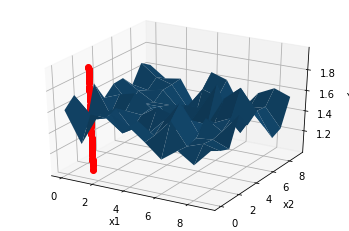

In [359]:
prediction = predict_simple_line_regression(X, Beta_hat)
draw_3d_graph (X,Y,prediction)

## Usage lstsq function

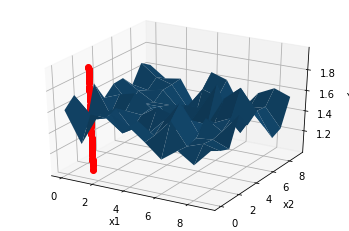

[53.75127144 -4.1425426  -3.53380525 -1.89626375 -3.54523096  2.76970682
 -2.6608345  -4.02572842  0.59355979 -1.69663957 -7.99589922]


In [360]:
Beta_hat = learn_linear_regression_using_lstsq(X,Y)
prediction = predict_simple_line_regression(X, Beta_hat)
draw_3d_graph (X,Y,prediction)

print(Beta_hat)

<hr style="border:2px solid gray"> </hr>